# Telecom churn - Case study
    Team members:
        Anuprabha and Arvind Girish

#### Business objective :
    1.Find customers who are likely to churn
    2.Identity churn features

#### steps followed:
    1. data processing
    2. Driving new feature and tagging customers
    3. exploratory data analysis
    4. Random forest - to find feature importance
    5. Feature scaling
    6. smote
    7. PCA (with smote and without smote)
    8. model building (with smote and without smote)
        Logistic regression , Decision tree ,Random forest , Adaboost , Gradientboost
    9. Model comparison

In [1]:
#import lib
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from imblearn.combine import SMOTETomek
from collections import Counter

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, f1_score, classification_report,precision_score,recall_score,confusion_matrix, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
df.shape

(99999, 226)

In [4]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

# 1. data processing

In [5]:
# Rename month to code 

df.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8',
                   'sep_vbc_3g':'vbc_3g_9'},inplace=True)

#### Drop date columns

In [6]:
# drop all date columns
date_drop = [x for x in df.columns if 'date' in x]
date_drop

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [7]:
df = df.drop(date_drop,axis=1)

In [8]:
df.shape

(99999, 214)

### missing value tratment

In [9]:
# getting percentage of null value
null_col=round(100*df.isnull().sum()/len(df.index),2) 
null_col[null_col!=0].sort_values()


loc_og_t2o_mou         1.02
std_og_t2o_mou         1.02
loc_ic_t2o_mou         1.02
std_og_mou_7           3.86
loc_og_t2m_mou_7       3.86
std_ic_mou_7           3.86
loc_ic_mou_7           3.86
std_og_t2c_mou_7       3.86
loc_og_t2f_mou_7       3.86
std_ic_t2o_mou_7       3.86
loc_og_t2c_mou_7       3.86
std_ic_t2t_mou_7       3.86
std_og_t2f_mou_7       3.86
loc_ic_t2t_mou_7       3.86
loc_og_mou_7           3.86
std_ic_t2f_mou_7       3.86
std_og_t2t_mou_7       3.86
std_og_t2m_mou_7       3.86
loc_og_t2t_mou_7       3.86
std_ic_t2m_mou_7       3.86
spl_ic_mou_7           3.86
isd_og_mou_7           3.86
roam_og_mou_7          3.86
og_others_7            3.86
loc_ic_t2f_mou_7       3.86
isd_ic_mou_7           3.86
roam_ic_mou_7          3.86
onnet_mou_7            3.86
spl_og_mou_7           3.86
loc_ic_t2m_mou_7       3.86
offnet_mou_7           3.86
ic_others_7            3.86
std_ic_t2m_mou_6       3.94
std_og_t2f_mou_6       3.94
og_others_6            3.94
std_ic_t2t_mou_6    

In [10]:
# checking missing values for month 8 or any 

df.loc[df.night_pck_user_8.isnull()&df.total_rech_data_8.isnull() & df.max_rech_data_8.isnull()&df.count_rech_2g_8.isnull(),['count_rech_2g_8','total_rech_data_8','max_rech_data_8','night_pck_user_8']].head()

,count_rech_2g_8,total_rech_data_8,max_rech_data_8,night_pck_user_8
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN


    - From above it is observed that .There is a pattern in missing values. some values are 
             missing altogether as the customer didnot recharge . 
    - so impute all missing values with zero.
    

In [11]:
# Impute zero 

df.fillna(0, inplace=True)

In [12]:
# check missing values again
null_col=round(100*df.isnull().sum()/len(df.index),2)
null_col[null_col!=0]

Series([], dtype: float64)

#### Drop columns :
 Below columns can be dropped
  
  - mobile number 
  - total_rech_data_6 = count_rech_2g_6 + count_rech_3g_6 
        so drop count_reach_2g and 3g for all 4 months


In [13]:
df = df.drop(['mobile_number',
              'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
              'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9' ],axis=1)

### Unique values

Drop columns which have more than 95% same information content.

In [14]:
uni_col=[]  # list of columns with unique value
for i in df.columns:
    x = df[i].value_counts(normalize=True).max()
    if(x>=.95):
        print(i,"   :",x)
        uni_col.append(i)
uni_col    

circle_id    : 1.0
loc_og_t2o_mou    : 1.0
std_og_t2o_mou    : 1.0
loc_ic_t2o_mou    : 1.0
std_og_t2c_mou_6    : 1.0
std_og_t2c_mou_7    : 1.0
std_og_t2c_mou_8    : 1.0
std_og_t2c_mou_9    : 1.0
isd_og_mou_6    : 0.9520095200952009
isd_og_mou_7    : 0.9550995509955099
isd_og_mou_8    : 0.958359583595836
isd_og_mou_9    : 0.956959569595696
og_others_7    : 0.996529965299653
og_others_8    : 0.995889958899589
og_others_9    : 0.995779957799578
std_ic_t2o_mou_6    : 1.0
std_ic_t2o_mou_7    : 1.0
std_ic_t2o_mou_8    : 1.0
std_ic_t2o_mou_9    : 1.0
night_pck_user_6    : 0.993689936899369
night_pck_user_7    : 0.994109941099411
night_pck_user_8    : 0.994509945099451
night_pck_user_9    : 0.995859958599586
sachet_3g_6    : 0.9581895818958189
sachet_3g_7    : 0.95869958699587
sachet_3g_8    : 0.9580995809958099
sachet_3g_9    : 0.957269572695727


['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'isd_og_mou_9',
 'og_others_7',
 'og_others_8',
 'og_others_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'sachet_3g_9']

In [15]:
df = df.drop(uni_col,axis=1)  

In [16]:
df.shape

(99999, 178)

In [17]:
# change negative values in ARPU to -1
df['arpu_6']=df.arpu_6.apply(lambda x:x if x>0 else -1)
df['arpu_7']=df.arpu_7.apply(lambda x:x if x>0 else -1)
df['arpu_8']=df.arpu_8.apply(lambda x:x if x>0 else -1)
df['arpu_9']=df.arpu_9.apply(lambda x:x if x>0 else -1)

## New feature

        - total data recharge--> amt_data_rech = total_rech_data * av_rech_amt_data
        - total call recharge---> total_rech_amt -> given
        - total amount = total data recharge + total call recharge
        - find 70 th percentile and filter high value customer

In [18]:
# find average of recharge amount of 6&7 and find 70th percentile

# add  new columns for recharge +data recharge   

df['total_amt_6'] = df['total_rech_amt_6']+ (df['total_rech_data_6']*df['av_rech_amt_data_6'])
df['total_amt_7'] = df['total_rech_amt_7']+ (df['total_rech_data_7']*df['av_rech_amt_data_7'])

# mean recharge amount of first 2 months

df['avg_rech_amt_good'] = df[['total_amt_6','total_amt_7']].mean(axis=1)
 

In [19]:
# filter high value customers

df= df[df['avg_rech_amt_good']>=(df['avg_rech_amt_good'].quantile(.7))]

In [20]:
df.shape

(30001, 181)

In [21]:
df.avg_rech_amt_good.describe()

count    30001.000000
mean      1152.620628
std       1358.713982
min        478.000000
25%        603.000000
50%        800.000000
75%       1208.000000
max      61236.000000
Name: avg_rech_amt_good, dtype: float64

In [22]:
df.avg_rech_amt_good.quantile(.997)

10941.0

#### Remove outliers

In [23]:
# filter outliers from high value customers

df= df[df['avg_rech_amt_good']<(df['avg_rech_amt_good'].quantile(.997))]

In [24]:
df.shape

(29910, 181)

## Tag churners
Tag the churned customers (churn=1, else 0) based on the fourth month as follows:
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

•	total_ic_mou_9
•	total_og_mou_9
•	vol_2g_mb_9
•	vol_3g_mb_9


In [25]:
# churn target variable 1-churn

df['churn'] = df.apply(lambda x:1 if (x.total_ic_mou_9==0) and (x.total_og_mou_9==0) and
                       (x.vol_2g_mb_9==0) and (x.vol_3g_mb_9==0) else 0 ,axis=1)

In [26]:
df.churn.value_counts()*100 / len(df.index)


0    91.852223
1     8.147777
Name: churn, dtype: float64

#### remove attributes of the churn phase

In [27]:
# remove all the columns of 9th month
churn_mnth =  [x for x in df.columns if '9' in x]
churn_mnth

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'spl_og_mou_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'fb_user_9',
 'vbc_3g_9']

In [28]:
df = df.drop(churn_mnth,axis=1)
df.shape

(29910, 138)

# 3. EDA

In [29]:
# function - plots
def distplot_numeric(data, columns):
    for column in columns:
        sns.distplot(data[column])
        plt.show()
        
def barchart_wrt_churn(data, columns):
    for column in columns:
        sns.barplot(x='churn', y=column, data=data)
        plt.show()
        
def boxplot_wrt_churn(data, columns):
    for column in columns:
        sns.boxplot(x='churn', y=column, data=data)
        plt.show()
    
plt.figure(figsize=(5, 5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

### Univariate analysis:

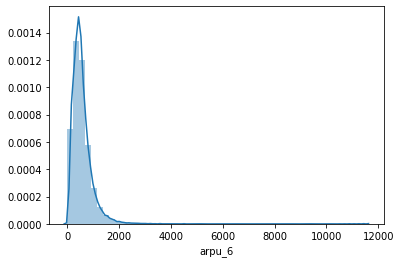

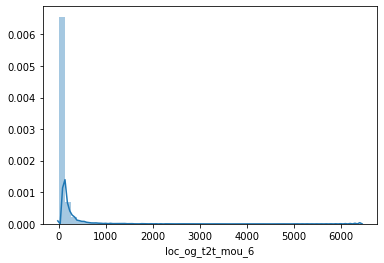

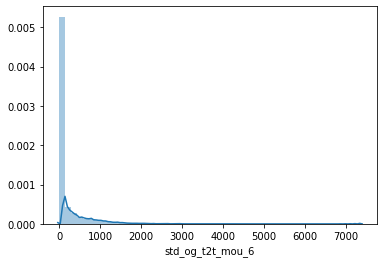

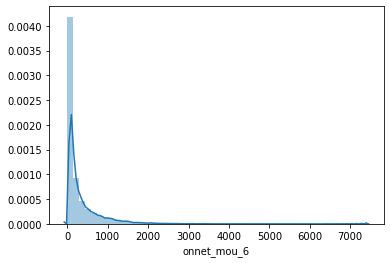

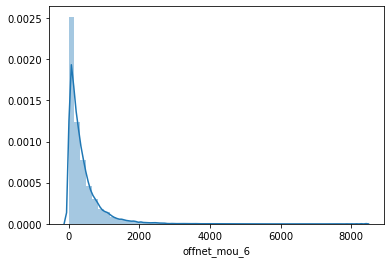

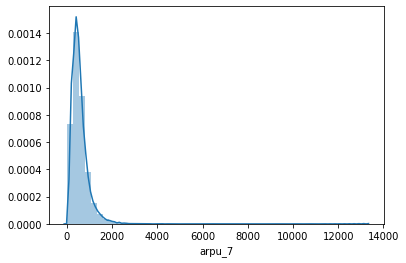

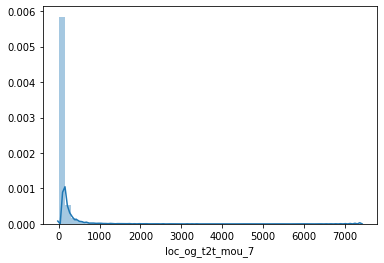

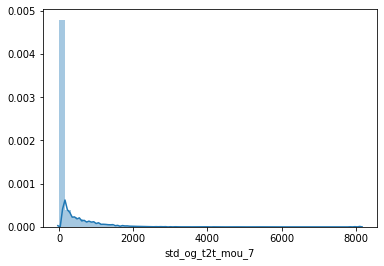

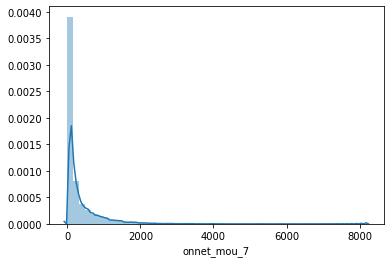

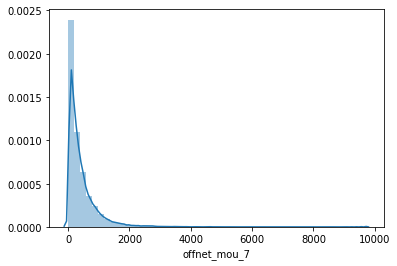

In [30]:
distplot_numeric(df, ['arpu_6','loc_og_t2t_mou_6','std_og_t2t_mou_6', 'onnet_mou_6', 'offnet_mou_6', 
                      'arpu_7','loc_og_t2t_mou_7','std_og_t2t_mou_7', 'onnet_mou_7', 'offnet_mou_7'])

### Bivariate analysis:

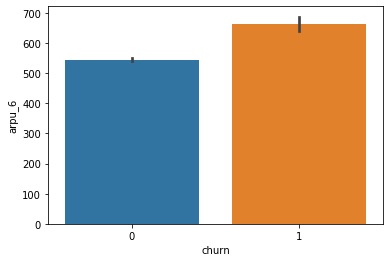

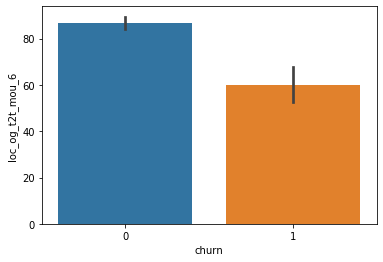

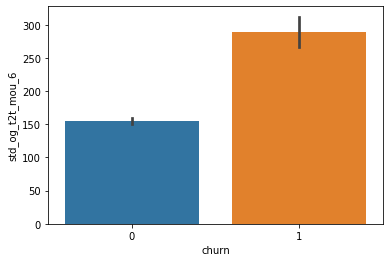

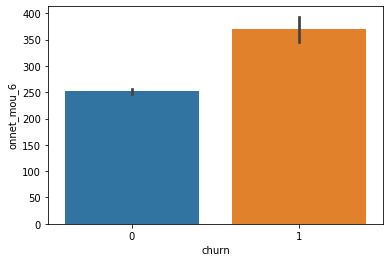

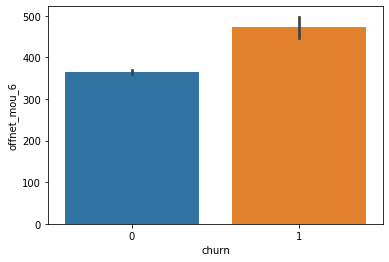

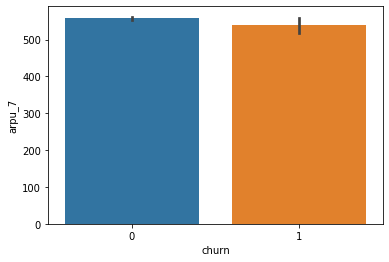

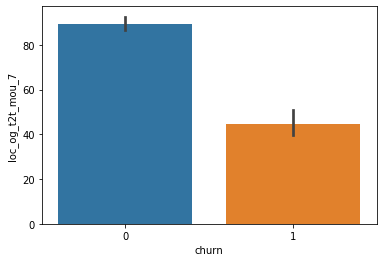

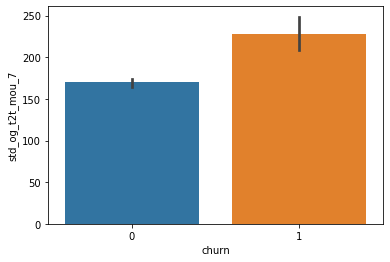

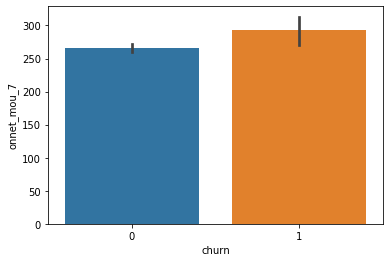

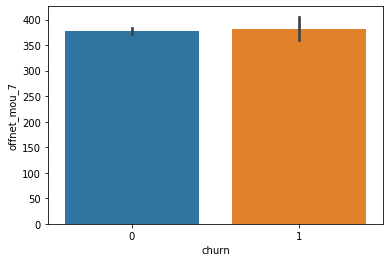

In [31]:
barchart_wrt_churn(df, ['arpu_6','loc_og_t2t_mou_6','std_og_t2t_mou_6', 'onnet_mou_6', 'offnet_mou_6', 'arpu_7',
                        'loc_og_t2t_mou_7','std_og_t2t_mou_7', 'onnet_mou_7', 'offnet_mou_7'])

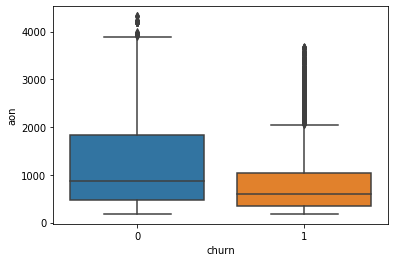

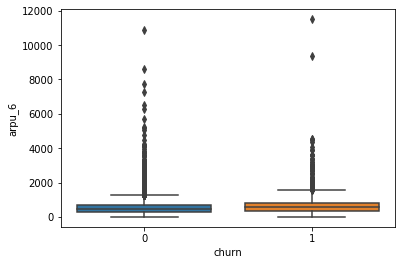

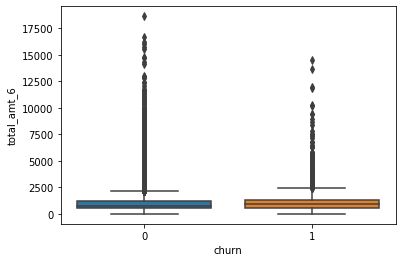

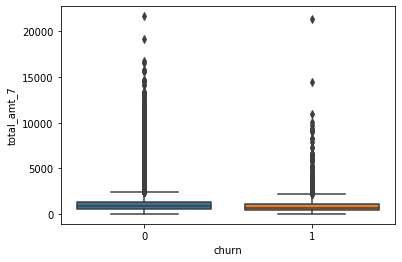

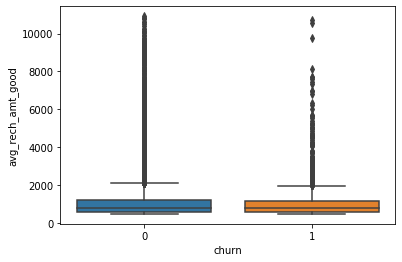

In [32]:
boxplot_wrt_churn(df, ['aon', 'arpu_6', 'total_amt_6','total_amt_7', 'avg_rech_amt_good'])

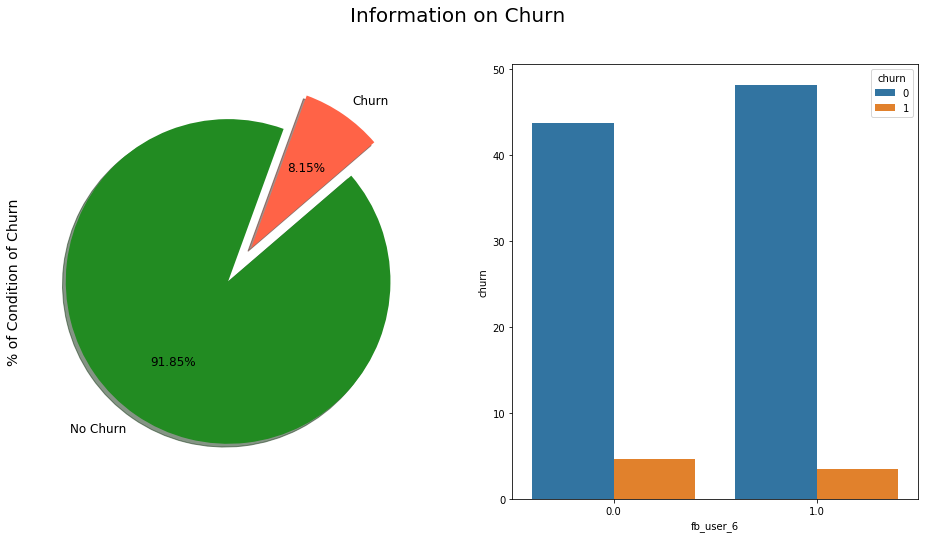

In [33]:
#churn

f, ax = plt.subplots(1, 2, figsize=(16,8))
colors = ["#228B22", "#FF6347"]

labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)

df["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Churn', fontsize=14)

sns.barplot(x="fb_user_6", y="churn", hue="churn", data=df, estimator=lambda x: len(x) / len(df) * 100)



# Train &  Test split

In [34]:
# Putting feature variable to X
X = df.drop(['churn'],axis=1)

# Putting response variable to y
y = df['churn']

In [35]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)

In [36]:
X_train.shape

(20937, 137)

In [37]:
X_test.shape

(8973, 137)

# Feature importance

#### Random forest before smote- to find feature importance  


In [38]:
rf = RandomForestClassifier()

params_rf={'max_depth': [5, 10, 20],
          'min_samples_split': [5, 10, 20],
          'max_features': [5,10],
          'n_estimators': [10, 30, 50],
          'min_samples_leaf': [2, 5, 10],
          'bootstrap': [True, False]
}

model_rf = RandomizedSearchCV(rf, params_rf, cv=3,n_iter = 100, random_state=42, n_jobs=-1, verbose=2)
model_rf.fit(X_train, y_train)
model_rf.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.9min finished


{'n_estimators': 30,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 5,
 'max_depth': 5,
 'bootstrap': False}

In [39]:
# random forest best fit model creation
model_rf = RandomForestClassifier(n_estimators=30, 
                             max_depth=20,
                             min_samples_split=10,
                             max_features = 5,
                            criterion='entropy',
                            oob_score=True)

model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=5,
                       min_samples_split=10, n_estimators=30, oob_score=True)

In [40]:
# Extract feature importances
feature_importance_rf = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model_rf.feature_importances_})
feature_importance_rf.sort_values(by=['importance'],ascending=False,inplace=True)

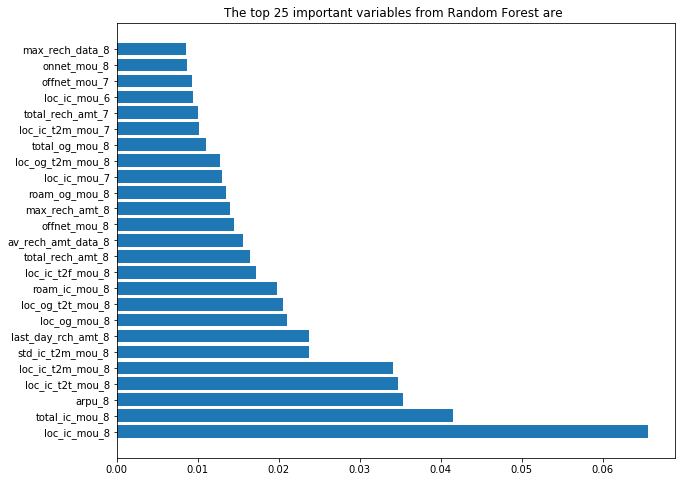

In [41]:
plt.figure(figsize=(10,8))
plt.barh(feature_importance_rf['feature'].iloc[:25,],width=feature_importance_rf['importance'].iloc[:25,])
plt.title('The top 25 important variables from Random Forest are ')
plt.show()

## Feature Standardisation


In [42]:
#create an object

scaler = MinMaxScaler()

In [43]:
# without smote 
X_train = scaler.fit_transform(X_train)

In [44]:
X_test = scaler.transform(X_test)

## SMOTE Sampling 
    smote is done only on train set.

In [45]:
print('Before Sampling')
print(Counter(y))

oversample = SMOTETomek(random_state=42)
X_train_sm ,y_train_sm = oversample.fit_resample(X_train,y_train)

print('After Sampling')
print(Counter(y_train_sm))

Before Sampling
Counter({0: 27473, 1: 2437})
After Sampling
Counter({0: 19216, 1: 19216})


In [46]:
y_train_sm.shape

(38432,)

In [47]:
y_train.shape

(20937,)

# PCA
    Dimentionality reduction

### 1. PCA without smote

In [48]:
pca = PCA(random_state=42)

In [49]:
pca.fit(X_train)

PCA(random_state=42)

In [50]:
#pca.explained_variance_ratio_

In [51]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

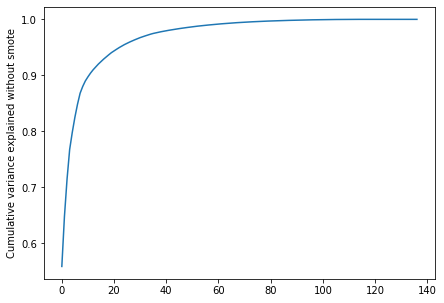

In [52]:
fig = plt.figure(figsize=[7,5])

plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained without smote")
plt.show()

    50 components can be taken.

In [53]:
pca_final = IncrementalPCA(n_components=50)

In [54]:
# PCA without smote
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(20937, 50)

In [55]:
# PCA without smote
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8973, 50)

### 2.PCA with Smote

In [56]:
pca_sm = PCA(random_state=42)

In [57]:
pca_sm.fit(X_train_sm)

PCA(random_state=42)

In [58]:
var_cumu_sm = np.cumsum(pca_sm.explained_variance_ratio_)

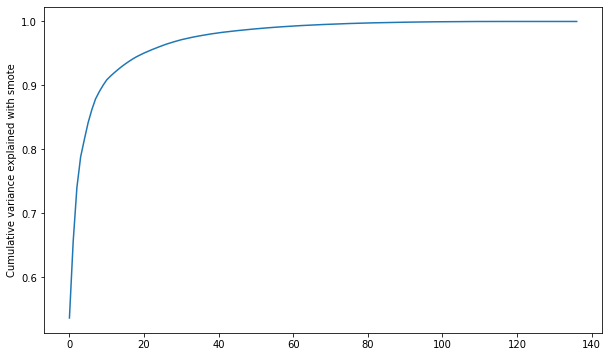

In [59]:
fig = plt.figure(figsize=[10,6])

plt.plot(var_cumu_sm)
plt.ylabel("Cumulative variance explained with smote")
plt.show()

In [60]:
pca_sm_final = IncrementalPCA(n_components=50)

In [61]:
# PCA with smote
X_train_pca_sm = pca_sm_final.fit_transform(X_train_sm)
X_train_pca_sm.shape

(38432, 50)

In [62]:
# PCA with smote
X_test_pca_sm = pca_sm_final.transform(X_test)
X_test_pca_sm.shape

(8973, 50)

# Model building:
    Build models with and without PCA and compare.

In [63]:
# variables for model comparison
model = []
sample = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
F1score_train = []
F1score_test = []
AUCROC_train = []
AUCROC_test = []


In [64]:
# Function for finding performance metrics

def evaluation(churn_model, X_train,y_train,X_test, y_test, algo=None, sampling=None):
    
# Train predicion
    y_prob_train=churn_model.predict_proba(X_train)
    y_pred_train=churn_model.predict(X_train)

    print('Train Score:')
    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_train,y_pred_train),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_train,y_pred_train),"\n")
    print('AUC-ROC = ',roc_auc_score(y_train, y_prob_train[:,1]))
    print('recall = ',recall_score(y_train,y_pred_train),"\n")
        
    print('#'*60)
#list to compare different models          
    model.append(algo)
    sample.append(sampling)
    
    precision_train.append(precision_score(y_train,y_pred_train))
    recall_train.append(recall_score(y_train,y_pred_train))
    F1score_train.append(f1_score(y_train,y_pred_train))
    AUCROC_train.append(roc_auc_score(y_train, y_prob_train[:,1]))
    
    
# Test prediction
    y_prob_test=churn_model.predict_proba(X_test)
    y_pred_test=churn_model.predict(X_test)

    print('Test Score:')
    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred_test),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred_test),"\n")
    print('AUC-ROC=',roc_auc_score(y_test, y_prob_test[:,1]))
    print('recall = ',recall_score(y_test,y_pred_test),"\n")
        
#list to compare different models          

    precision_test.append(precision_score(y_test,y_pred_test))
    recall_test.append(recall_score(y_test,y_pred_test))
    F1score_test.append(f1_score(y_test,y_pred_test))
    AUCROC_test.append(roc_auc_score(y_test, y_prob_test[:,1]))


## model 1- Logistic regression - without smote

In [65]:
log=LogisticRegression()

params={'C':[10, 1, 0.5, 0.1],'penalty':['l1','l2'],'class_weight':['balanced']}


# Create grid search using 4-fold cross validation
model_LR = GridSearchCV(log, params, cv=4, scoring='roc_auc', n_jobs=-1)
model_LR.fit(X_train_pca, y_train)
model_LR.best_estimator_

C:\Users\Prabhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight='balanced')

In [66]:
evaluation(model_LR, X_train_pca, y_train, X_test_pca, y_test, 'Logitic Regression', 'without smote')

Train Score:
Confusion Matrix
[[15610  3616]
 [  284  1427]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     19226
           1       0.28      0.83      0.42      1711

    accuracy                           0.81     20937
   macro avg       0.63      0.82      0.66     20937
weighted avg       0.92      0.81      0.85     20937
 

AUC-ROC =  0.8940813698185227
recall =  0.8340151957919345 

############################################################
Test Score:
Confusion Matrix
[[6705 1542]
 [ 111  615]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8247
           1       0.29      0.85      0.43       726

    accuracy                           0.82      8973
   macro avg       0.63      0.83      0.66      8973
weighted avg       0.93      0.82      0.85      8973
 

AUC-ROC= 0.9013839576358179
recall =  0.847107438016528

## model 2 - logistic regression with smote

In [67]:
model_LR.fit(X_train_pca_sm, y_train_sm)

C:\Users\Prabhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [10, 1, 0.5, 0.1], 'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [68]:
evaluation(model_LR, X_train_pca_sm,y_train_sm,X_test_pca_sm, y_test, 'Logitic Regression', 'with smote')

Train Score:
Confusion Matrix
[[15671  3545]
 [ 2747 16469]] 

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.82      0.83     19216
           1       0.82      0.86      0.84     19216

    accuracy                           0.84     38432
   macro avg       0.84      0.84      0.84     38432
weighted avg       0.84      0.84      0.84     38432
 

AUC-ROC =  0.9071584733111666
recall =  0.8570462114904246 

############################################################
Test Score:
Confusion Matrix
[[6736 1511]
 [ 113  613]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8247
           1       0.29      0.84      0.43       726

    accuracy                           0.82      8973
   macro avg       0.64      0.83      0.66      8973
weighted avg       0.93      0.82      0.86      8973
 

AUC-ROC= 0.9018957056259878
recall =  0.844352617079889

## model 3 - Decision tree without smote

In [69]:

dt = DecisionTreeClassifier(random_state=42)
params_tree = {
    'max_depth': [2,5,10,15],
    'min_samples_split' : [5,10,15,20],
    'min_samples_leaf': [3,5,8],
}

model_tree = GridSearchCV(estimator=dt, 
                           param_grid=params_tree, 
                           cv=3, n_jobs=-1, verbose=2, scoring = "roc_auc")
model_tree.fit(X_train_pca,y_train)
model_tree.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   43.6s finished


DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=5,
                       random_state=42)

### Decision tree with best hyperparameters

In [70]:
dt_best = DecisionTreeClassifier(max_depth=5, 
                                 min_samples_leaf=3, 
                                 min_samples_split=5,
                                 random_state=42)
dt_best.fit(X_train_pca,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=5,
                       random_state=42)

In [71]:
evaluation(dt_best, X_train_pca, y_train, X_test_pca, y_test, 'Decision Tree', 'without smote')

Train Score:
Confusion Matrix
[[19047   179]
 [ 1395   316]] 

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     19226
           1       0.64      0.18      0.29      1711

    accuracy                           0.92     20937
   macro avg       0.79      0.59      0.62     20937
weighted avg       0.91      0.92      0.91     20937
 

AUC-ROC =  0.8276514890128754
recall =  0.18468731735827001 

############################################################
Test Score:
Confusion Matrix
[[8102  145]
 [ 616  110]] 

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      8247
           1       0.43      0.15      0.22       726

    accuracy                           0.92      8973
   macro avg       0.68      0.57      0.59      8973
weighted avg       0.89      0.92      0.90      8973
 

AUC-ROC= 0.7927970134226956
recall =  0.15151515151515

## model 4 - Decision tree with smote

In [72]:
model_tree.fit(X_train_pca_sm,y_train_sm)
model_tree.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.3min finished


DecisionTreeClassifier(max_depth=15, min_samples_leaf=8, min_samples_split=20,
                       random_state=42)

### Decision tree (smote) with best hyperparameters

In [73]:
dt_best_sm = DecisionTreeClassifier(max_depth=15, 
                                 min_samples_leaf=8, 
                                 min_samples_split=20,
                                 random_state=42)
dt_best_sm.fit(X_train_pca_sm,y_train_sm)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=8, min_samples_split=20,
                       random_state=42)

In [74]:
evaluation(dt_best_sm, X_train_pca_sm,y_train_sm,X_test_pca_sm, y_test, 'Decision Tree', 'with smote')

Train Score:
Confusion Matrix
[[17644  1572]
 [ 1000 18216]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     19216
           1       0.92      0.95      0.93     19216

    accuracy                           0.93     38432
   macro avg       0.93      0.93      0.93     38432
weighted avg       0.93      0.93      0.93     38432
 

AUC-ROC =  0.9781627763686208
recall =  0.9479600333055787 

############################################################
Test Score:
Confusion Matrix
[[7043 1204]
 [ 297  429]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      8247
           1       0.26      0.59      0.36       726

    accuracy                           0.83      8973
   macro avg       0.61      0.72      0.63      8973
weighted avg       0.90      0.83      0.86      8973
 

AUC-ROC= 0.770609547974871
recall =  0.5909090909090909

## model 5 - Random forest without smote

In [75]:
rf = RandomForestClassifier()

params_rf={'max_depth': [5, 10, 20],
          'min_samples_leaf': [5, 10, 20],
          'max_features': [5,10],
          'n_estimators': [10, 30, 50]
}

model_rf = RandomizedSearchCV(rf, params_rf, cv=3,n_iter = 100, random_state=42, n_jobs=-1, verbose=2)
model_rf.fit(X_train_pca, y_train)
model_rf.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


C:\Users\Prabhu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 54 is smaller than n_iter=100. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  2.7min finished


RandomForestClassifier(max_depth=20, max_features=10, min_samples_leaf=5,
                       n_estimators=50)

### Best fit Random forest without smote

In [76]:
rf_best = RandomForestClassifier(max_depth=20, 
                                 max_features=10, 
                                 min_samples_leaf=5,
                       n_estimators=50,bootstrap = True)
rf_best.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=20, max_features=10, min_samples_leaf=5,
                       n_estimators=50)

In [77]:
evaluation(rf_best, X_train_pca, y_train, X_test_pca, y_test, 'Random Forest', 'without smote')

Train Score:
Confusion Matrix
[[19222     4]
 [  745   966]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     19226
           1       1.00      0.56      0.72      1711

    accuracy                           0.96     20937
   macro avg       0.98      0.78      0.85     20937
weighted avg       0.97      0.96      0.96     20937
 

AUC-ROC =  0.9960632527924785
recall =  0.5645821157218002 

############################################################
Test Score:
Confusion Matrix
[[8187   60]
 [ 611  115]] 

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8247
           1       0.66      0.16      0.26       726

    accuracy                           0.93      8973
   macro avg       0.79      0.58      0.61      8973
weighted avg       0.91      0.93      0.90      8973
 

AUC-ROC= 0.87541892685912
recall =  0.1584022038567493 

## model 6 - Random forest with smote

In [78]:
model_rf.fit(X_train_pca_sm,y_train_sm)
model_rf.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


C:\Users\Prabhu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 54 is smaller than n_iter=100. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  5.4min finished


RandomForestClassifier(max_depth=20, max_features=10, min_samples_leaf=5,
                       n_estimators=50)

#### Best fit Random forest with smote

In [79]:
rf_best_sm = RandomForestClassifier(max_depth=20, 
                                 max_features=10, 
                                 min_samples_leaf=5,
                       n_estimators=50,bootstrap = True)
rf_best_sm.fit(X_train_pca_sm, y_train_sm)

RandomForestClassifier(max_depth=20, max_features=10, min_samples_leaf=5,
                       n_estimators=50)

In [80]:
evaluation(rf_best_sm,X_train_pca_sm,y_train_sm, X_test_pca_sm, y_test, 'Random Forest', 'with smote')

Train Score:
Confusion Matrix
[[18688   528]
 [   81 19135]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     19216
           1       0.97      1.00      0.98     19216

    accuracy                           0.98     38432
   macro avg       0.98      0.98      0.98     38432
weighted avg       0.98      0.98      0.98     38432
 

AUC-ROC =  0.9987742957532267
recall =  0.9957847626977518 

############################################################
Test Score:
Confusion Matrix
[[7641  606]
 [ 264  462]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8247
           1       0.43      0.64      0.52       726

    accuracy                           0.90      8973
   macro avg       0.70      0.78      0.73      8973
weighted avg       0.92      0.90      0.91      8973
 

AUC-ROC= 0.8880869443801418
recall =  0.636363636363636

## model 7 - AdaBoost without smote

In [81]:


#learning rate is the hyperparameter
lr = [0.05,0.01, 0.1, 0.25, 0.5, 0.75, 1]

#decision tree with depth=1 are referred as decision stumps
d_tree=DecisionTreeClassifier(criterion='entropy',max_depth=1)

parameters_table=[]
#choosing hyper parameters (learning rate)
for i in lr:
    model_ada = AdaBoostClassifier(   learning_rate=i, 
                                      base_estimator=d_tree, 
                                      random_state=100)
    model_ada.fit(X_train_pca, y_train)
    accuracy_training=round(model_ada.score(X_train_pca, y_train),2)
    accuracy_validation=round(model_ada.score(X_test_pca, y_test),2)
    parameters_table.append([i,accuracy_training,accuracy_validation])


In [82]:
hyper_param_df=pd.DataFrame(parameters_table).reset_index().rename(columns={0:'learning_rate',
                                                                  1:'training_accuracy',
                                                                 2:'validaton_accuracy'})

hyper_param_df

,index,learning_rate,training_accuracy,validaton_accuracy
0,0,0.05,0.92,0.92
1,1,0.01,0.92,0.92
2,2,0.10,0.92,0.92
3,3,0.25,0.92,0.92
4,4,0.50,0.92,0.92
5,5,0.75,0.93,0.93
6,6,1.00,0.93,0.92


### Best fit Adaboost without smote

In [83]:
ada_best=AdaBoostClassifier( learning_rate=0.5, 
                             base_estimator=d_tree, 
                             random_state=100)

ada_best.fit(X_train_pca,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1),
                   learning_rate=0.5, random_state=100)

In [84]:
evaluation(ada_best, X_train_pca, y_train, X_test_pca, y_test, 'AdaBoosting', 'without smote')

Train Score:
Confusion Matrix
[[19102   124]
 [ 1464   247]] 

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     19226
           1       0.67      0.14      0.24      1711

    accuracy                           0.92     20937
   macro avg       0.80      0.57      0.60     20937
weighted avg       0.91      0.92      0.90     20937
 

AUC-ROC =  0.8946598499268262
recall =  0.14436002337814144 

############################################################
Test Score:
Confusion Matrix
[[8197   50]
 [ 633   93]] 

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8247
           1       0.65      0.13      0.21       726

    accuracy                           0.92      8973
   macro avg       0.79      0.56      0.59      8973
weighted avg       0.91      0.92      0.90      8973
 

AUC-ROC= 0.8859772365675339
recall =  0.12809917355371

## model 8 - AdaBoost with smote

In [85]:
parameters_table=[]
#choosing hyper parameters (learning rate)
for i in lr:
    model_ada = AdaBoostClassifier(   learning_rate=i, 
                                      base_estimator=d_tree, 
                                      random_state=100)
    model_ada.fit(X_train_pca_sm, y_train_sm)
    accuracy_training=round(model_ada.score(X_train_pca_sm, y_train_sm),2)
    accuracy_validation=round(model_ada.score(X_test_pca_sm, y_test),2)
    parameters_table.append([i,accuracy_training,accuracy_validation])

In [86]:
hyper_param_df=pd.DataFrame(parameters_table).reset_index().rename(columns={0:'learning_rate',
                                                                  1:'training_accuracy',
                                                                 2:'validaton_accuracy'})

hyper_param_df

,index,learning_rate,training_accuracy,validaton_accuracy
0,0,0.05,0.74,0.74
1,1,0.01,0.70,0.77
2,2,0.10,0.77,0.78
3,3,0.25,0.81,0.80
4,4,0.50,0.82,0.81
5,5,0.75,0.82,0.81
6,6,1.00,0.83,0.81


### Best fit Adaboost with smote

In [87]:
ada_best_sm=AdaBoostClassifier( learning_rate=0.5, 
                             base_estimator=d_tree, 
                             random_state=100)

ada_best_sm.fit(X_train_pca_sm,y_train_sm)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1),
                   learning_rate=0.5, random_state=100)

In [88]:
evaluation(ada_best_sm, X_train_pca_sm, y_train_sm, X_test_pca_sm, y_test, 'AdaBoosting', 'with smote')

Train Score:
Confusion Matrix
[[15782  3434]
 [ 3343 15873]] 

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.82      0.82     19216
           1       0.82      0.83      0.82     19216

    accuracy                           0.82     38432
   macro avg       0.82      0.82      0.82     38432
weighted avg       0.82      0.82      0.82     38432
 

AUC-ROC =  0.8993759580380213
recall =  0.8260303913405496 

############################################################
Test Score:
Confusion Matrix
[[6719 1528]
 [ 139  587]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8247
           1       0.28      0.81      0.41       726

    accuracy                           0.81      8973
   macro avg       0.63      0.81      0.65      8973
weighted avg       0.92      0.81      0.85      8973
 

AUC-ROC= 0.8823480681346353
recall =  0.808539944903581

## model 9 - GradientBoost without smote

In [89]:
lr = [ 0.05, 0.01,0.1, 0.25, 0.5, 0.75, 1]

parameters_table=[]
for i in lr:
    model_gb = GradientBoostingClassifier(n_estimators=20, learning_rate =i, 
                                          max_features=5, max_depth=2,random_state=42)
    model_gb.fit(X_train_pca, y_train)
    accuracy_training=round(model_gb.score(X_train_pca, y_train),2)
    accuracy_validation=round(model_gb.score(X_test_pca, y_test),2)
    parameters_table.append([i,accuracy_training,accuracy_validation])

hyper_param_df=pd.DataFrame(parameters_table).reset_index().rename(columns={0:'learning_rate',
                                                                  1:'training_accuracy',
                                                                 2:'validaton_accuracy'})

hyper_param_df

,index,learning_rate,training_accuracy,validaton_accuracy
0,0,0.05,0.92,0.92
1,1,0.01,0.92,0.92
2,2,0.10,0.92,0.92
3,3,0.25,0.92,0.92
4,4,0.50,0.93,0.92
5,5,0.75,0.93,0.93
6,6,1.00,0.93,0.92


### best fit GradientBoost without smote

In [90]:
best_gb = GradientBoostingClassifier(n_estimators=20, 
                                    learning_rate=0.5, 
                                    max_features=5, 
                                    max_depth=2,
                                    random_state=42)
 

best_gb.fit(X_train_pca, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=5,
                           n_estimators=20, random_state=42)

In [91]:
evaluation(best_gb, X_train_pca, y_train, X_test_pca, y_test, 'GradientBoosting', 'without smote')

Train Score:
Confusion Matrix
[[19096   130]
 [ 1432   279]] 

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     19226
           1       0.68      0.16      0.26      1711

    accuracy                           0.93     20937
   macro avg       0.81      0.58      0.61     20937
weighted avg       0.91      0.93      0.90     20937
 

AUC-ROC =  0.8784860878110279
recall =  0.16306253652834599 

############################################################
Test Score:
Confusion Matrix
[[8185   62]
 [ 616  110]] 

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8247
           1       0.64      0.15      0.24       726

    accuracy                           0.92      8973
   macro avg       0.78      0.57      0.60      8973
weighted avg       0.91      0.92      0.90      8973
 

AUC-ROC= 0.8655213466053773
recall =  0.15151515151515

## model 10 - GradientBoost with smote

In [92]:
lr = [ 0.05, 0.01,0.1, 0.25, 0.5, 0.75, 1]

parameters_table=[]
for i in lr:
    model_gb = GradientBoostingClassifier(n_estimators=20, learning_rate =i, 
                                          max_features=5, max_depth=2,random_state=42)
    model_gb.fit(X_train_pca_sm, y_train_sm)
    accuracy_training=round(model_gb.score(X_train_pca_sm, y_train_sm),2)
    accuracy_validation=round(model_gb.score(X_test_pca_sm, y_test),2)
    parameters_table.append([i,accuracy_training,accuracy_validation])

hyper_param_df=pd.DataFrame(parameters_table).reset_index().rename(columns={0:'learning_rate',
                                                                  1:'training_accuracy',
                                                                 2:'validaton_accuracy'})

hyper_param_df

,index,learning_rate,training_accuracy,validaton_accuracy
0,0,0.05,0.78,0.76
1,1,0.01,0.77,0.75
2,2,0.10,0.79,0.76
3,3,0.25,0.80,0.78
4,4,0.50,0.81,0.79
5,5,0.75,0.81,0.79
6,6,1.00,0.82,0.79


### Best fit GradientBoost with smote

In [93]:
best_gb_sm = GradientBoostingClassifier(n_estimators=20, 
                                    learning_rate=0.5, 
                                    max_features=5, 
                                    max_depth=2,
                                    random_state=42)
 

best_gb_sm.fit(X_train_pca_sm, y_train_sm)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=5,
                           n_estimators=20, random_state=42)

In [94]:
evaluation(best_gb_sm, X_train_pca_sm, y_train_sm, X_test_pca_sm, y_test, 'GradientBoosting', 'with smote')

Train Score:
Confusion Matrix
[[15330  3886]
 [ 3439 15777]] 

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     19216
           1       0.80      0.82      0.81     19216

    accuracy                           0.81     38432
   macro avg       0.81      0.81      0.81     38432
weighted avg       0.81      0.81      0.81     38432
 

AUC-ROC =  0.8872676015762955
recall =  0.8210345545378851 

############################################################
Test Score:
Confusion Matrix
[[6517 1730]
 [ 166  560]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.79      0.87      8247
           1       0.24      0.77      0.37       726

    accuracy                           0.79      8973
   macro avg       0.61      0.78      0.62      8973
weighted avg       0.92      0.79      0.83      8973
 

AUC-ROC= 0.8554631770263902
recall =  0.771349862258953

# Model comparison:
    Models are compared with without smote.

In [95]:
eval_df = pd.DataFrame({'model':model,
                            'resample':sample,
                            'precision_train':precision_train,
                            'recall_train':recall_train,
                            'f1-score_train':F1score_train,
                            'AUC-ROC_train':AUCROC_train,
                       'precision_test':precision_test,
                            'recall_test':recall_test,
                            'f1-score_test':F1score_test,
                            'AUC-ROC_test':AUCROC_test})
eval_df

,model,resample,precision_train,recall_train,f1-score_train,AUC-ROC_train,precision_test,recall_test,f1-score_test,AUC-ROC_test
0,Logitic Regression,without smote,0.282966,0.834015,0.422564,0.894081,0.285118,0.847107,0.426639,0.901384
1,Logitic Regression,with smote,0.822874,0.857046,0.839613,0.907158,0.288606,0.844353,0.430175,0.901896
2,Decision Tree,without smote,0.638384,0.184687,0.286491,0.827651,0.431373,0.151515,0.224261,0.792797
3,Decision Tree,with smote,0.920558,0.947960,0.934058,0.978163,0.262707,0.590909,0.363713,0.770610
4,Random Forest,without smote,0.995876,0.564582,0.720627,0.996063,0.657143,0.158402,0.255272,0.875419
5,Random Forest,with smote,0.973148,0.995785,0.984336,0.998774,0.432584,0.636364,0.515050,0.888087
6,AdaBoosting,without smote,0.665768,0.144360,0.237272,0.894660,0.650350,0.128099,0.214039,0.885977
7,AdaBoosting,with smote,0.822137,0.826030,0.824079,0.899376,0.277541,0.808540,0.413235,0.882348
8,GradientBoosting,without smote,0.682152,0.163063,0.263208,0.878486,0.639535,0.151515,0.244989,0.865521
9,GradientBoosting,with smote,0.802370,0.821035,0.811595,0.887268,0.244541,0.771350,0.371353,0.855463


Models performed well after smote.

### Best models after smote:
    1. logisic Regression: 
        train -> recall = 0.85 , auc-roc= 0.90
        test  -> recall = 0.84 , auc-roc= 0.90
    2. Adaboosting: 
        train -> recall = 0.82 , auc-roc= 0.89
        test  -> recall = 0.80 , auc-roc= 0.88

## Important churn predictors: 
        Found before performing pca.

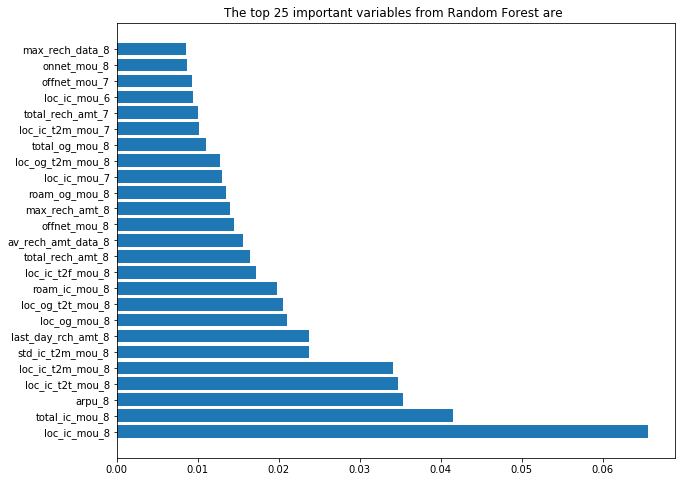

In [96]:
plt.figure(figsize=(10,8))
plt.barh(feature_importance_rf['feature'].iloc[:25,],width=feature_importance_rf['importance'].iloc[:25,])
plt.title('The top 25 important variables from Random Forest are ')
plt.show()

     - most of the top predictors are related to the 'action' phase (third month) of the customer lifecycle.

#### strategies to manage churn:
    1.free local and std mou
    2.reducing recharge amount
    3.Discounts on data packs
    4.Improvement on roaming services
    